In [1]:
import torch
from torchvision import models
from torchvision import transforms
from PIL import Image

In [2]:
categories = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [3]:
image = Image.open('image.jpg')

In [4]:
image.show()

In [6]:
model = models.segmentation.deeplabv3_resnet101(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/gouthamv/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:08<00:00, 20990855.59it/s]
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /home/gouthamv/.cache/torch/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 244545539/244545539 [00:37<00:00, 6454965.27it/s]


In [7]:
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(


In [9]:
transform = transforms.Compose([
    
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

In [10]:
transformed_image = transform(image)

In [11]:
transformed_image

tensor([[[-0.0629,  0.0569, -0.0116,  ...,  1.3927,  1.3755,  1.3413],
         [ 0.0741,  0.1083, -0.0116,  ...,  1.4098,  1.3927,  1.3755],
         [ 0.2282,  0.1426, -0.0116,  ...,  1.4098,  1.3927,  1.3927],
         ...,
         [ 0.8618,  0.4679, -0.1657,  ...,  0.0741, -0.0801, -0.1828],
         [ 0.4679, -0.0801, -0.7479,  ...,  0.1426,  0.0398, -0.0287],
         [ 0.3652,  0.8789, -0.8164,  ...,  0.1768,  0.1426,  0.1254]],

        [[-0.3901, -0.2675, -0.3375,  ...,  0.7129,  0.6954,  0.6604],
         [-0.2500, -0.2150, -0.3375,  ...,  0.7304,  0.7129,  0.6954],
         [-0.0924, -0.1800, -0.3375,  ...,  0.7479,  0.7304,  0.7304],
         ...,
         [ 1.2206,  0.8179,  0.3452,  ..., -0.3375, -0.4951, -0.6176],
         [ 0.8004,  0.2402, -0.2675,  ..., -0.2325, -0.3725, -0.4951],
         [ 0.6604,  1.2731, -0.3550,  ..., -0.1975, -0.2675, -0.3200]],

        [[-0.4275, -0.3055, -0.3753,  ...,  0.5834,  0.5659,  0.5311],
         [-0.2881, -0.2532, -0.3753,  ...,  0

In [16]:
input_image = transformed_image.unsqueeze(0)

In [17]:
input_image

tensor([[[[-0.0629,  0.0569, -0.0116,  ...,  1.3927,  1.3755,  1.3413],
          [ 0.0741,  0.1083, -0.0116,  ...,  1.4098,  1.3927,  1.3755],
          [ 0.2282,  0.1426, -0.0116,  ...,  1.4098,  1.3927,  1.3927],
          ...,
          [ 0.8618,  0.4679, -0.1657,  ...,  0.0741, -0.0801, -0.1828],
          [ 0.4679, -0.0801, -0.7479,  ...,  0.1426,  0.0398, -0.0287],
          [ 0.3652,  0.8789, -0.8164,  ...,  0.1768,  0.1426,  0.1254]],

         [[-0.3901, -0.2675, -0.3375,  ...,  0.7129,  0.6954,  0.6604],
          [-0.2500, -0.2150, -0.3375,  ...,  0.7304,  0.7129,  0.6954],
          [-0.0924, -0.1800, -0.3375,  ...,  0.7479,  0.7304,  0.7304],
          ...,
          [ 1.2206,  0.8179,  0.3452,  ..., -0.3375, -0.4951, -0.6176],
          [ 0.8004,  0.2402, -0.2675,  ..., -0.2325, -0.3725, -0.4951],
          [ 0.6604,  1.2731, -0.3550,  ..., -0.1975, -0.2675, -0.3200]],

         [[-0.4275, -0.3055, -0.3753,  ...,  0.5834,  0.5659,  0.5311],
          [-0.2881, -0.2532, -

In [26]:
prediction = model(input_image)

In [27]:
prediction

OrderedDict([('out',
              tensor([[[[11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
                        [11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
                        [11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
                        ...,
                        [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648],
                        [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648],
                        [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648]],
              
                       [[-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
                        [-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
                        [-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
                        ...,
                        [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185],
                        [-1.7911, -1.7911, -1

In [28]:
prediction['out']

tensor([[[[11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
          [11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
          [11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
          ...,
          [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648],
          [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648],
          [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648]],

         [[-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
          [-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
          [-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
          ...,
          [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185],
          [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185],
          [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185]],

         [[-1.7588, -1.7588, -1.7588,  ..., -1.2792, -1.2792, -1.2792],
          [-1.7588, -1.7588, -

In [32]:
output = prediction['out']

In [33]:
output

tensor([[[[11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
          [11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
          [11.4497, 11.4497, 11.4497,  ..., 10.4799, 10.4799, 10.4799],
          ...,
          [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648],
          [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648],
          [11.1672, 11.1672, 11.1672,  ...,  7.9648,  7.9648,  7.9648]],

         [[-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
          [-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
          [-1.2695, -1.2695, -1.2695,  ..., -0.7615, -0.7615, -0.7615],
          ...,
          [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185],
          [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185],
          [-1.7911, -1.7911, -1.7911,  ..., -1.9185, -1.9185, -1.9185]],

         [[-1.7588, -1.7588, -1.7588,  ..., -1.2792, -1.2792, -1.2792],
          [-1.7588, -1.7588, -

In [34]:
output.shape

torch.Size([1, 21, 333, 500])

In [78]:
op = torch.argmax(output.squeeze(), dim = 0).detach().numpy()

In [79]:
op

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
op.shape

(21, 333, 500)

In [44]:
import numpy as np
np.unique(op)

array([ 0, 13, 15])

In [45]:
label_colors = [(0, 0, 0),
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)]

In [50]:
r = np.zeros_like(op).astype(np.uint8)
g = np.zeros_like(op).astype(np.uint8)
b = np.zeros_like(op).astype(np.uint8)

In [51]:
r.shape

(333, 500)

In [52]:
g.shape

(333, 500)

In [53]:
b.shape

(333, 500)

In [56]:
op == 0

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [59]:
for i in range(len(label_colors)):
    index = op == i
    r[index] = label_colors[i][0]
    g[index] = label_colors[i][1]
    b[index] = label_colors[i][2]

In [60]:
ss_image = np.stack([r, g, b], axis = 2)

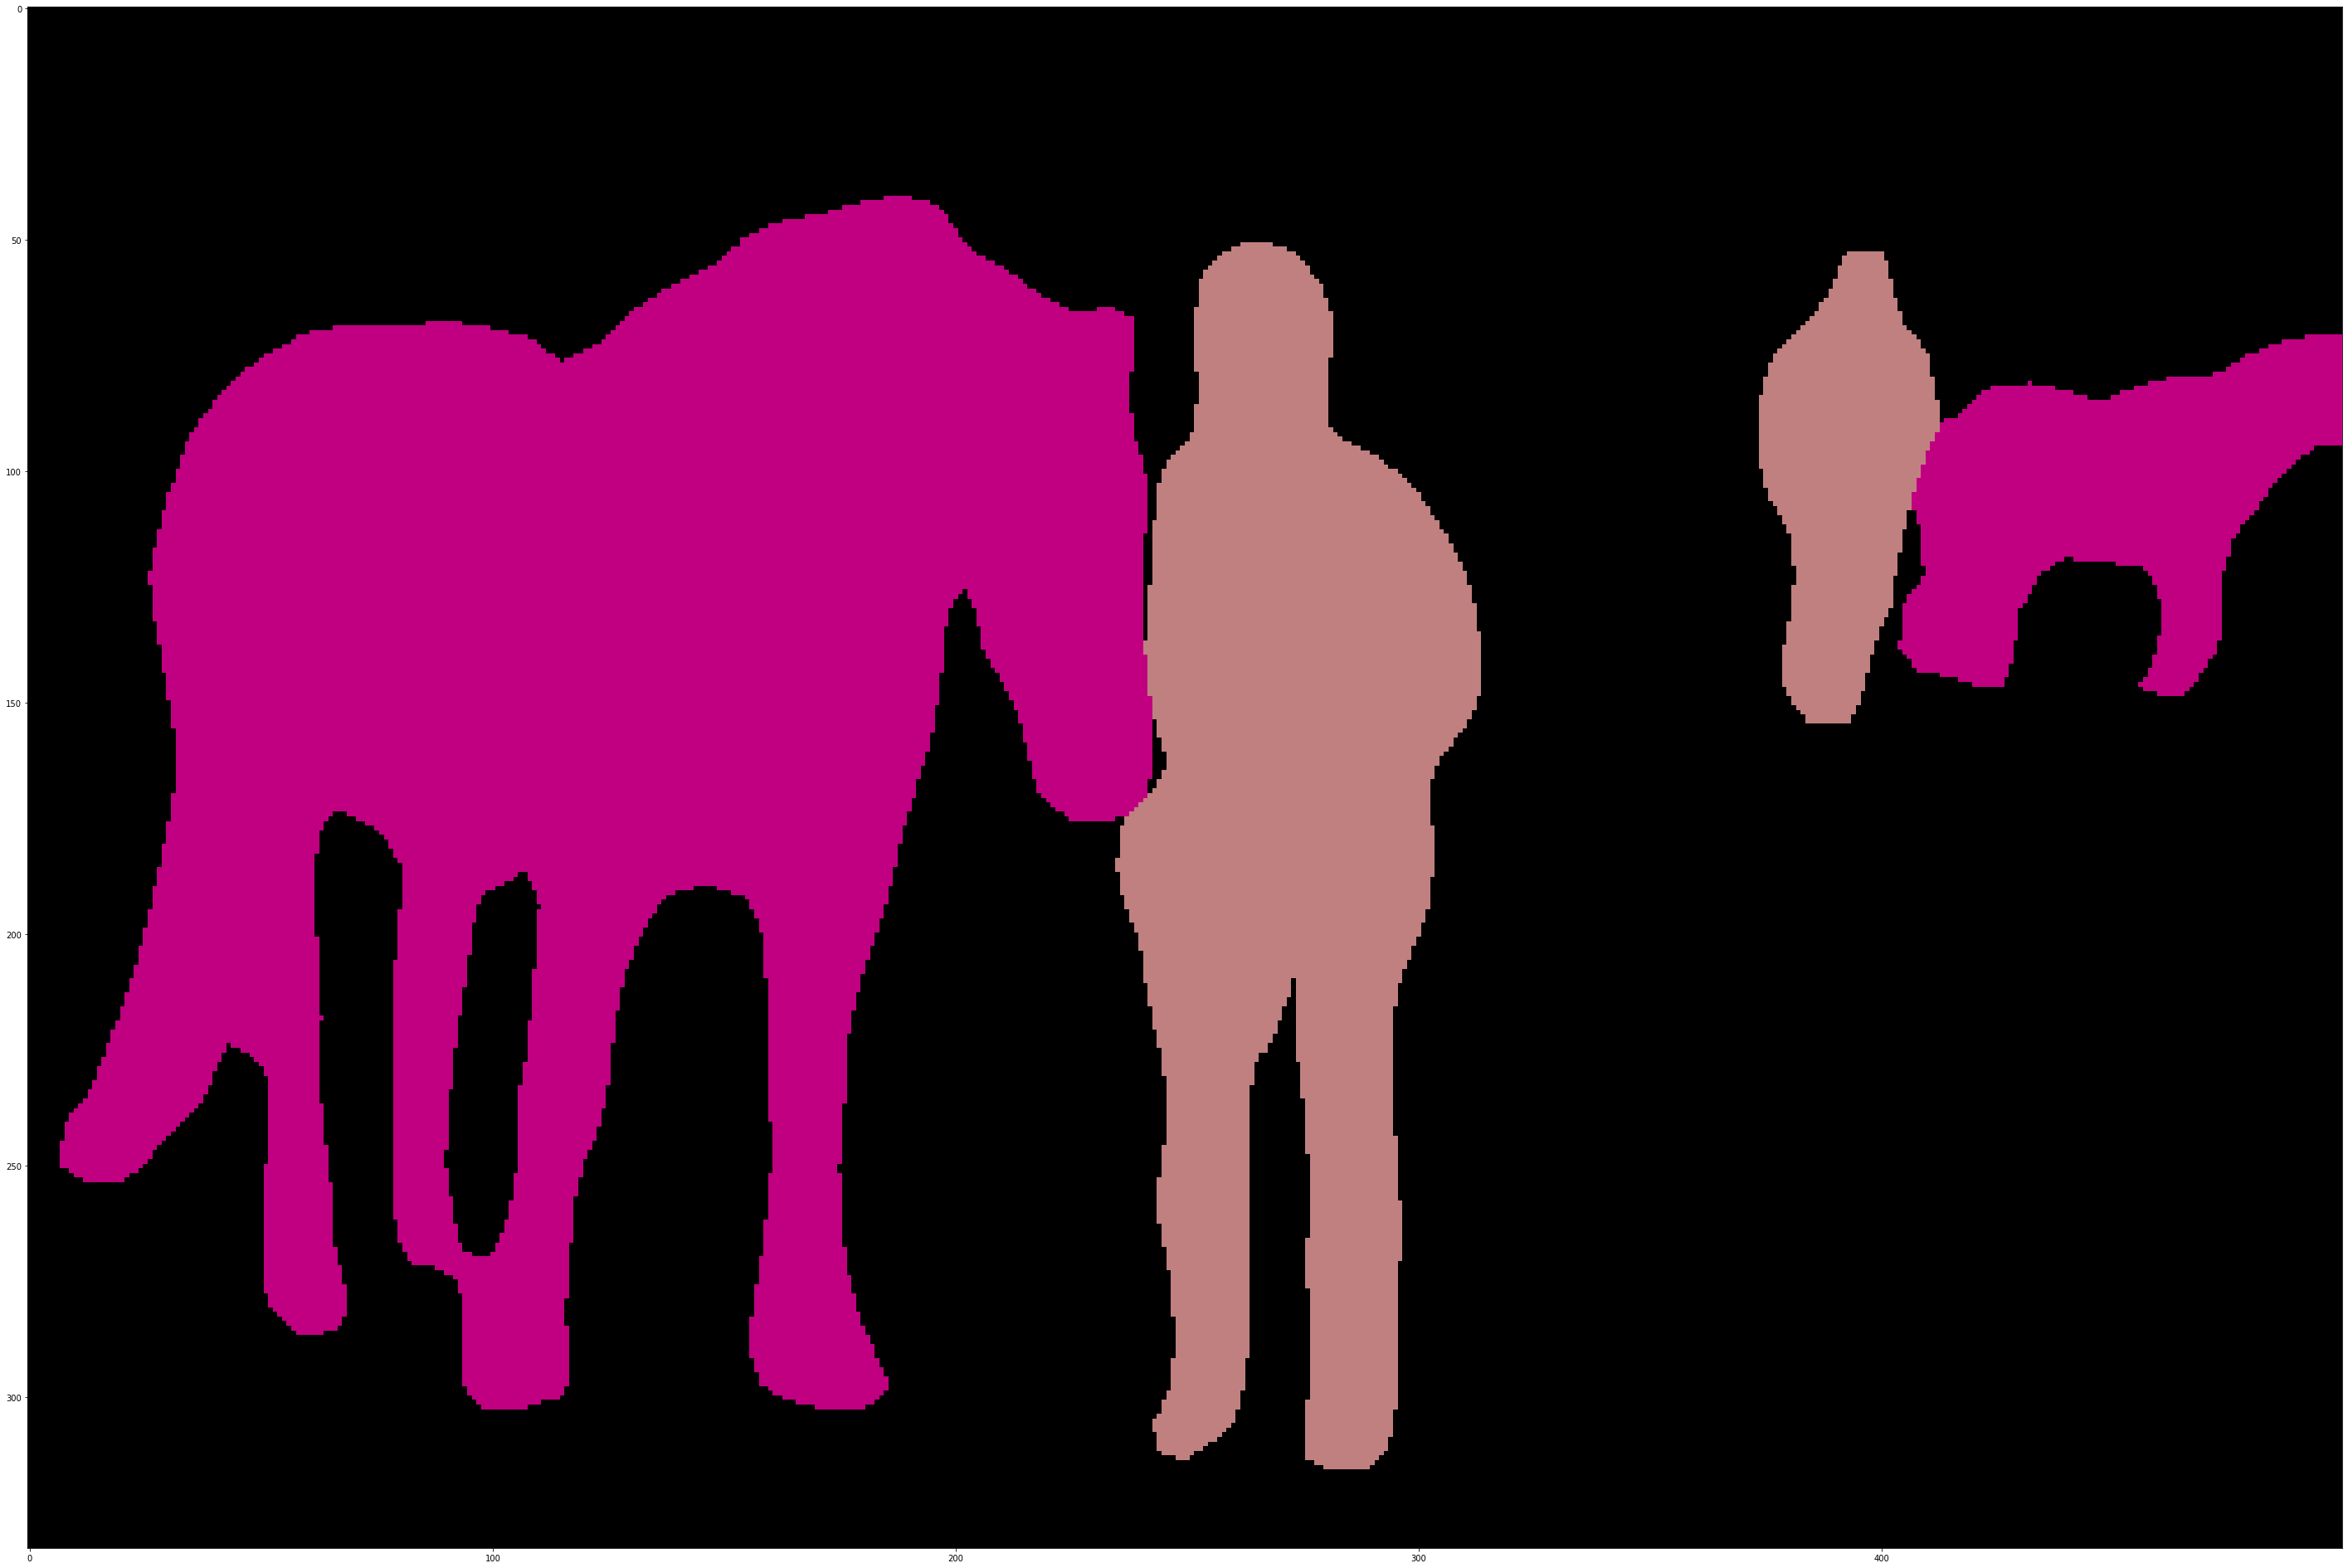

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50,50))
plt.imshow(ss_image)